#### [Data set here :](https://drive.google.com/file/d/1u4xnFun6BL8rMoOZr4a74yllv3a85l8s/view?usp=sharing)    

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc

Problem Statement

You are working as a data scientist in a global finance company. Over the years, the company has
collected basic bank details and gathered a lot of credit-related information. The management wants to
build an intelligent system to segregate the people into credit score brackets to reduce the manual
efforts.

Data Description:

1. ID:Represents a unique identification of an entry
2. Customer_ID:Represents a unique identification of a person
3. Month:Represents the month of the yea
4. Name:Represents the name of a person
5. Age:Represents the age of the person
6. SSN:Represents the social security number of a perso
7. Occupation:Represents the occupation of the person
8. Annual_Income:Represents the annual income of the person
9. Monthly_Inhand_Salary:Represents the monthly base salary of a person
10. Num_Bank_Accounts:Represents the number of bank accounts a person holds
11. Num_Credit_Card:Represents the number of other credit cards held by a person
12. Interest_Rate:Represents the interest rate on credit card
13. Num_of_Loan:Represents the number of loans taken from the bank
14. Type_of_Loan:Represents the types of loan taken by a person
15. Delay_from_due_date:Represents the average number of days delayed from the payment date
16. Num_of_Delayed_Payment:Represents the average number of payments delayed by a person
17. Changed_Credit_Limit:Represents the percentage change in credit card limit
18. Num_Credit_Inquiries:Represents the number of credit card inquiries
19. Credit_Mix: Represents the classification of the mix of credits
20. Outstanding_Debt: Represents the remaining debt to be paid (in USD)
21. Credit_Utilization: Represents the utilization ratio of credit card.
22. Credit_History_Age: Represents the age of credit history of the person.
23. Payment_of_Min_A: Represents whether only the minimum amount was paid by the person.
24. Total_EMI_per_mon: Represents the monthly EMI payments (in USD.
25. Amount_invested_: Represents the monthly amount invested by the customer (in USD).
26. Payment_Behaviour: Represents the payment behavior of the customer (in USD).
27. Monthly_Balance: Represents the monthly balance amount of the customer (in USD)
28. Credit_Score: Represents the bracket of credit score (Poor, Standard, Good)

Goal:

Given a person’s credit-related information, build a machine learning model that can classify the
credit score.

Task:

• Reading Data

• Data Exploration

• Data cleaning

• Data Preprocessing

• Modeling & Evaluation


# Reading data

In [17]:
df = pd.read_csv('train(10).csv')
pd.options.display.max_columns = None
df.head()


C:\Users\Dina\AppData\Local\Temp\ipykernel_15072\3952458303.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('train(10).csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


# Data Exploration 

In [18]:
df.shape

(100000, 28)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [20]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [22]:
df.isnull().sum().sort_values(ascending=False)

Monthly_Inhand_Salary       15002
Type_of_Loan                11408
Name                         9985
Credit_History_Age           9030
Num_of_Delayed_Payment       7002
Amount_invested_monthly      4479
Num_Credit_Inquiries         1965
Monthly_Balance              1200
ID                              0
Changed_Credit_Limit            0
Payment_Behaviour               0
Total_EMI_per_month             0
Payment_of_Min_Amount           0
Credit_Utilization_Ratio        0
Outstanding_Debt                0
Credit_Mix                      0
Delay_from_due_date             0
Customer_ID                     0
Num_of_Loan                     0
Interest_Rate                   0
Num_Credit_Card                 0
Num_Bank_Accounts               0
Annual_Income                   0
Occupation                      0
SSN                             0
Age                             0
Month                           0
Credit_Score                    0
dtype: int64

In [23]:
categorical_features = ['Month','Occupation', 'Type_of_Loan',  'Payment_Behaviour' ]
numerical_features =['Age','Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate',
                   'Num_of_Loan', 'Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Credit_Inquiries','Outstanding_Debt', 
                   'Credit_Utilization_Ratio','Total_EMI_per_month','Amount_invested_monthly', 'Monthly_Balance' ]
for col in categorical_columns:
    print(col, ": \n", df[col].unique())
    print("----------------------------------------------")


Month : 
 ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']
----------------------------------------------
Occupation : 
 ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
----------------------------------------------
Type_of_Loan : 
 ['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan'
 'Credit-Builder Loan' 'Auto Loan, Auto Loan, and Not Specified' ...
 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan'
 'Payday Loan, Student Loan, Mortgage Loan, and Not Specified'
 'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan']
----------------------------------------------
Payment_Behaviour : 
 ['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' '!@9#%8'
 'High_spent_Large_valu

# Data cleaning


In [24]:
df.drop_duplicates(inplace = True)

In [31]:
df.drop(columns = ['ID', 'Customer_ID','SSN', 'Credit_History_Age' ], inplace = True)

In [25]:
# handling missing values in categorical columns
categorical_columns_with_missing = df.select_dtypes(include=['object']).columns[df.select_dtypes(include=['object']).isnull().any()]

# Fill missing values in each categorical column with the most frequent category
for column in categorical_columns_with_missing:
    mode = df[column].mode()[0]
    df[column].fillna(mode, inplace=True)

In [26]:
# handling missing values in numerical columns
numerical_columns_with_missing = df.select_dtypes(include=['number']).columns[df.select_dtypes(include=['number']).isnull().any()]

# Impute missing values in each numerical column with the mean
for col in numerical_columns_with_missing:
    mean_value = df[col].mean()  # or median(), mode() based on your preference
    df[col].fillna(mean_value, inplace=True)


In [27]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

# Data Visualization

C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


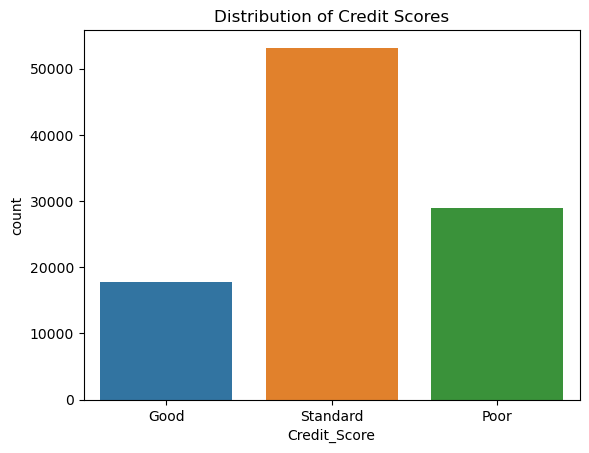

In [6]:
 # Distribution of the target variable
sns.countplot(x='Credit_Score', data=df)
plt.title('Distribution of Credit Scores')
plt.show()

C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


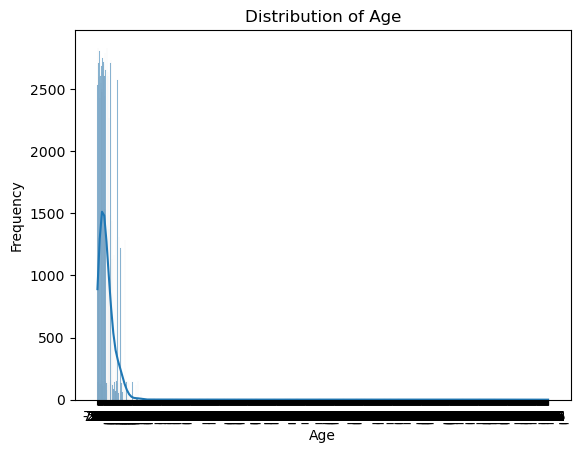

C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):

KeyboardInterrupt



In [9]:
# Distribution of numerical features
for feature in numerical_features:

    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


In [ ]:
# check for outliers
for feature in numerical_features:

    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.ylabel(feature)
    plt.show()


In [ ]:
# Correlation matrix
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Pairplot
sns.pairplot(data[numerical_features])
plt.show()

In [ ]:
# Distribution for categorical features
for feature in categorical_features:
    sns.countplot(x=feature, data=data)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


# Data preprocesssing

In [46]:
# Split data for features and target
X = df.drop(columns = 'Credit_Score')
y = df['Credit_Score']


In [53]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [56]:
categorical_cols = X.select_dtypes(include =['object']).columns
X[categorical_cols] = X[categorical_cols].astype('category')
X_dmatrix = xgb.DMatrix(X, label =y, enable_categorical = True)
X_array = X_dmatrix.get_data()
y_array = X_dmatrix.get_label()
X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.25)


In [57]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [59]:
y_test_pred = xgb_clf.predict(X_test)
y_train_pred = xgb_clf.predict(X_train)

# Model evaluation 

In [67]:

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Evaluation metrics")
print("-----------------------------------------")
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}% \n")

# Calculate precision
precision = precision_score(y_test, y_test_pred, average='weighted')
print("-----------------------------------------")
print(f"Precision:{precision:.2f}\n")

# Calculate recall
recall = recall_score(y_test, y_test_pred, average='weighted')
print("-----------------------------------------")
print(f"Recall:{recall:.2f}\n")

# Calculate F1-score
f1 = f1_score(y_test, y_test_pred, average='weighted')
print("-----------------------------------------")
print(f"F1-score:{f1:.2f}\n")


# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("-----------------------------------------")
print("Confusion Matrix:")
print(conf_matrix)

# classification report
report = classification_report(y_test, y_test_pred)
print("\n-----------------------------------------")
print("Classification Report:")
print(report)

Evaluation metrics
-----------------------------------------
Train Accuracy: 83.30%
Test Accuracy: 75.40% 

-----------------------------------------
Precision:0.75

-----------------------------------------
Recall:0.75

-----------------------------------------
F1-score:0.75

-----------------------------------------
Confusion Matrix:
[[ 3093    69  1301]
 [  242  5208  1872]
 [ 1121  1544 10550]]

-----------------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      0.69      0.69      4463
         1.0       0.76      0.71      0.74      7322
         2.0       0.77      0.80      0.78     13215

    accuracy                           0.75     25000
   macro avg       0.74      0.73      0.74     25000
weighted avg       0.75      0.75      0.75     25000



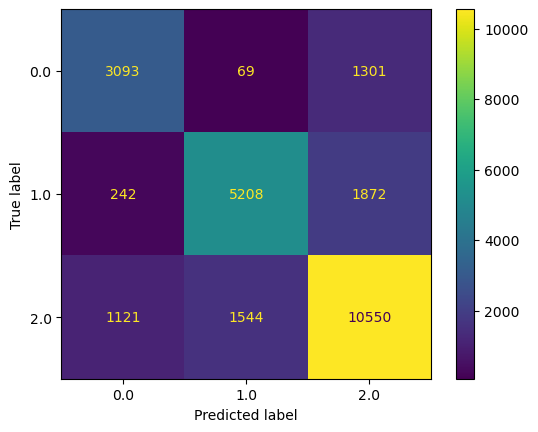

In [68]:
ConfusionMatrixDisplay.from_estimator(xgb_clf,X_test,y_test)

In [79]:
xgb_clf = XGBClassifier(n_estimators = 1000, learning_rate = .05, n_jobs =-1)
xgb_clf.fit(X_train, y_train, early_stopping_rounds =5, eval_set = [(test_X, test_y)])

C:\Users\Dina\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.07135
[1]	validation_0-mlogloss:1.04631
[2]	validation_0-mlogloss:1.02324
[3]	validation_0-mlogloss:1.00190
[4]	validation_0-mlogloss:0.98214
[5]	validation_0-mlogloss:0.96372
[6]	validation_0-mlogloss:0.94660
[7]	validation_0-mlogloss:0.93062
[8]	validation_0-mlogloss:0.91561
[9]	validation_0-mlogloss:0.90178
[10]	validation_0-mlogloss:0.88870
[11]	validation_0-mlogloss:0.87579
[12]	validation_0-mlogloss:0.86363
[13]	validation_0-mlogloss:0.85230
[14]	validation_0-mlogloss:0.84167
[15]	validation_0-mlogloss:0.83166
[16]	validation_0-mlogloss:0.82231
[17]	validation_0-mlogloss:0.81355
[18]	validation_0-mlogloss:0.80521
[19]	validation_0-mlogloss:0.79740
[20]	validation_0-mlogloss:0.79009
[21]	validation_0-mlogloss:0.78321
[22]	validation_0-mlogloss:0.77661
[23]	validation_0-mlogloss:0.77039
[24]	validation_0-mlogloss:0.76444
[25]	validation_0-mlogloss:0.75885
[26]	validation_0-mlogloss:0.75363
[27]	validation_0-mlogloss:0.74866
[28]	validation_0-mlogloss:0.7

[230]	validation_0-mlogloss:0.58461
[231]	validation_0-mlogloss:0.58436
[232]	validation_0-mlogloss:0.58401
[233]	validation_0-mlogloss:0.58360
[234]	validation_0-mlogloss:0.58323
[235]	validation_0-mlogloss:0.58293
[236]	validation_0-mlogloss:0.58260
[237]	validation_0-mlogloss:0.58219
[238]	validation_0-mlogloss:0.58183
[239]	validation_0-mlogloss:0.58152
[240]	validation_0-mlogloss:0.58123
[241]	validation_0-mlogloss:0.58098
[242]	validation_0-mlogloss:0.58050
[243]	validation_0-mlogloss:0.58021
[244]	validation_0-mlogloss:0.57984
[245]	validation_0-mlogloss:0.57959
[246]	validation_0-mlogloss:0.57916
[247]	validation_0-mlogloss:0.57882
[248]	validation_0-mlogloss:0.57839
[249]	validation_0-mlogloss:0.57813
[250]	validation_0-mlogloss:0.57781
[251]	validation_0-mlogloss:0.57750
[252]	validation_0-mlogloss:0.57709
[253]	validation_0-mlogloss:0.57676
[254]	validation_0-mlogloss:0.57637
[255]	validation_0-mlogloss:0.57602
[256]	validation_0-mlogloss:0.57569
[257]	validation_0-mlogloss:

[458]	validation_0-mlogloss:0.51760
[459]	validation_0-mlogloss:0.51724
[460]	validation_0-mlogloss:0.51709
[461]	validation_0-mlogloss:0.51682
[462]	validation_0-mlogloss:0.51654
[463]	validation_0-mlogloss:0.51635
[464]	validation_0-mlogloss:0.51607
[465]	validation_0-mlogloss:0.51577
[466]	validation_0-mlogloss:0.51552
[467]	validation_0-mlogloss:0.51529
[468]	validation_0-mlogloss:0.51504
[469]	validation_0-mlogloss:0.51488
[470]	validation_0-mlogloss:0.51465
[471]	validation_0-mlogloss:0.51437
[472]	validation_0-mlogloss:0.51415
[473]	validation_0-mlogloss:0.51392
[474]	validation_0-mlogloss:0.51363
[475]	validation_0-mlogloss:0.51336
[476]	validation_0-mlogloss:0.51319
[477]	validation_0-mlogloss:0.51293
[478]	validation_0-mlogloss:0.51263
[479]	validation_0-mlogloss:0.51237
[480]	validation_0-mlogloss:0.51210
[481]	validation_0-mlogloss:0.51185
[482]	validation_0-mlogloss:0.51170
[483]	validation_0-mlogloss:0.51142
[484]	validation_0-mlogloss:0.51111
[485]	validation_0-mlogloss:

[686]	validation_0-mlogloss:0.46822
[687]	validation_0-mlogloss:0.46801
[688]	validation_0-mlogloss:0.46774
[689]	validation_0-mlogloss:0.46752
[690]	validation_0-mlogloss:0.46730
[691]	validation_0-mlogloss:0.46705
[692]	validation_0-mlogloss:0.46685
[693]	validation_0-mlogloss:0.46666
[694]	validation_0-mlogloss:0.46648
[695]	validation_0-mlogloss:0.46628
[696]	validation_0-mlogloss:0.46601
[697]	validation_0-mlogloss:0.46587
[698]	validation_0-mlogloss:0.46573
[699]	validation_0-mlogloss:0.46554
[700]	validation_0-mlogloss:0.46542
[701]	validation_0-mlogloss:0.46521
[702]	validation_0-mlogloss:0.46499
[703]	validation_0-mlogloss:0.46480
[704]	validation_0-mlogloss:0.46454
[705]	validation_0-mlogloss:0.46439
[706]	validation_0-mlogloss:0.46422
[707]	validation_0-mlogloss:0.46399
[708]	validation_0-mlogloss:0.46384
[709]	validation_0-mlogloss:0.46361
[710]	validation_0-mlogloss:0.46343
[711]	validation_0-mlogloss:0.46321
[712]	validation_0-mlogloss:0.46308
[713]	validation_0-mlogloss:

[914]	validation_0-mlogloss:0.42772
[915]	validation_0-mlogloss:0.42757
[916]	validation_0-mlogloss:0.42741
[917]	validation_0-mlogloss:0.42723
[918]	validation_0-mlogloss:0.42705
[919]	validation_0-mlogloss:0.42687
[920]	validation_0-mlogloss:0.42673
[921]	validation_0-mlogloss:0.42662
[922]	validation_0-mlogloss:0.42646
[923]	validation_0-mlogloss:0.42628
[924]	validation_0-mlogloss:0.42610
[925]	validation_0-mlogloss:0.42591
[926]	validation_0-mlogloss:0.42578
[927]	validation_0-mlogloss:0.42568
[928]	validation_0-mlogloss:0.42560
[929]	validation_0-mlogloss:0.42539
[930]	validation_0-mlogloss:0.42521
[931]	validation_0-mlogloss:0.42505
[932]	validation_0-mlogloss:0.42492
[933]	validation_0-mlogloss:0.42477
[934]	validation_0-mlogloss:0.42464
[935]	validation_0-mlogloss:0.42453
[936]	validation_0-mlogloss:0.42436
[937]	validation_0-mlogloss:0.42420
[938]	validation_0-mlogloss:0.42399
[939]	validation_0-mlogloss:0.42381
[940]	validation_0-mlogloss:0.42362
[941]	validation_0-mlogloss:

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [80]:
y_test_pred = xgb_clf.predict(X_test)
y_train_pred = xgb_clf.predict(X_train)

In [81]:

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Evaluation metrics")
print("-----------------------------------------")
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}% \n")

# Calculate precision
precision = precision_score(y_test, y_test_pred, average='weighted')
print("-----------------------------------------")
print(f"Precision:{precision:.2f}\n")

# Calculate recall
recall = recall_score(y_test, y_test_pred, average='weighted')
print("-----------------------------------------")
print(f"Recall:{recall:.2f}\n")

# Calculate F1-score
f1 = f1_score(y_test, y_test_pred, average='weighted')
print("-----------------------------------------")
print(f"F1-score:{f1:.2f}\n")


# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("-----------------------------------------")
print("Confusion Matrix:")
print(conf_matrix)

# classification report
report = classification_report(y_test, y_test_pred)
print("\n-----------------------------------------")
print("Classification Report:")
print(report)

Evaluation metrics
-----------------------------------------
Train Accuracy: 87.75%
Test Accuracy: 77.08% 

-----------------------------------------
Precision:0.77

-----------------------------------------
Recall:0.77

-----------------------------------------
F1-score:0.77

-----------------------------------------
Confusion Matrix:
[[ 3174    58  1231]
 [  190  5415  1717]
 [ 1036  1499 10680]]

-----------------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.71      0.72      4463
         1.0       0.78      0.74      0.76      7322
         2.0       0.78      0.81      0.80     13215

    accuracy                           0.77     25000
   macro avg       0.76      0.75      0.76     25000
weighted avg       0.77      0.77      0.77     25000



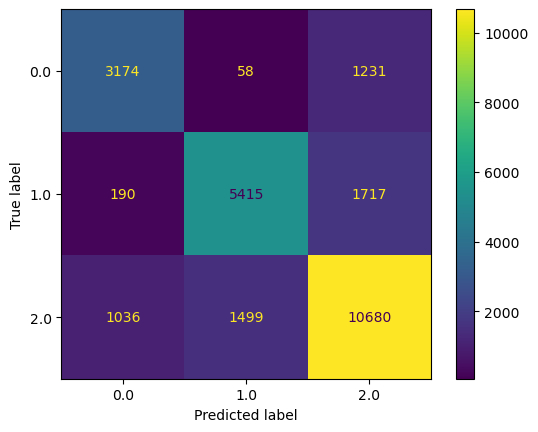

In [82]:
ConfusionMatrixDisplay.from_estimator(xgb_clf,X_test,y_test)